Problem:

**A food delivery service recorded the data of delivery time taken and the time taken for the deliveries to be sorted by the restaurants in order to improve their delivery services. Approach – A Simple Linear regression model needs to be built with target variable ‘Delivery.Time’. Apply necessary transformations and record the RMSE values, Correlation coefficient values for different transformation models.**

Business Objective: To find the reason behind delay in deliveries.

Constraints: Perform statistical inferences on these parameters.

Data: The data used for this analysis contains information on 21 records of Delivering time and sorting time.

At first,we need to understand the data and hence we load the same and the libraries required.

In [ ]:
# Importing necessary libraries
import pandas as pd # deals with data frame                     # for Data Manipulation\n",
import numpy as np  # deals with numerical values              # for Mathematical calculations\n",

wcat = pd.read_excel('D:/7 data mining/supervised/linear regresstion/assignment/delivery_time.xlsx')

wcat.describe()
########## We have two columns in our dataset, Delivery time and sorting time in which we have 21 rows.

              DT         ST
count  21.000000  21.000000
mean   16.790952   6.190476
std     5.074901   2.542028
min     8.000000   2.000000
25%    13.500000   4.000000
50%    17.830000   6.000000
75%    19.750000   8.000000
max    29.000000  10.000000

#Graphical Representation
###We use histogram, boxplot, scatter plot and regression line plot for better understanding the dataset.
import matplotlib.pyplot as plt # mostly used for visualization purposes 

plt.bar(height = wcat.ST, x = np.arange(1, 22, 1))
plt.hist(wcat.ST) #histogram
plt.boxplot(wcat.ST) #boxplot

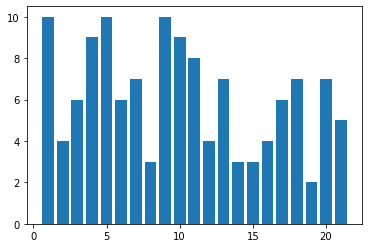

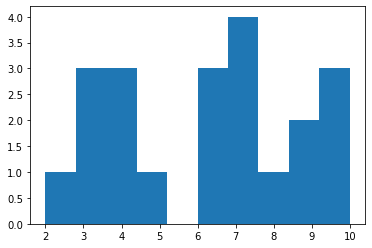

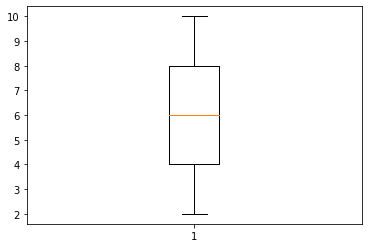

In [ ]:
plt.bar(height = wcat.DT, x = np.arange(1, 22, 1))
plt.hist(wcat.DT) #histogram
plt.boxplot(wcat.DT) #boxplot

# Scatter plot
plt.scatter(x = wcat['DT'], y = wcat['ST'], color = 'green')

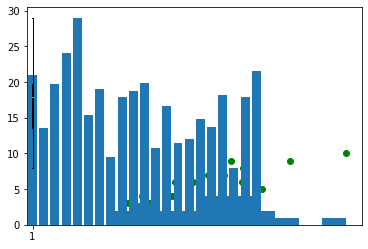

In [ ]:
###### This function is used to measure the strength of the relationship between two variables and we get good correlation b/w Weight gain and calories consumed column.
###### And the correlation coefficient value is given below.
# correlation
np.corrcoef(wcat.DT, wcat.ST) 
>>>>array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

# Covariance
# NumPy does not have a function to calculate the covariance between two variables directly. 
# Function for calculating a covariance matrix called cov() 
# By default, the cov() function will calculate the unbiased or sample covariance between the provided random variables.

cov_output = np.cov(wcat.DT, wcat.ST)[0, 1]
cov_output
####Out[22]: 10.655809523809523
# wcat.cov()


# Import library
import statsmodels.formula.api as smf

# Simple Linear Regression
model = smf.ols('ST ~ DT', data = wcat).fit()
model.summary()
####<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ST   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           3.98e-06
Time:                        14:47:15   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7567      1.134     -0.667      0.513      -3.130       1.617
DT             0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

pred1 = model.predict(pd.DataFrame(wcat['DT']))

# Regression Line
plt.scatter(wcat.DT, wcat.ST)
plt.plot(wcat.DT, pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Error calculation
res1 = wcat.ST - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1
####Out[36]: 1.3983430567957227

#### This method is used measuring the difference between values predicted by a model and their actual values. and the root mean square error 1 is 1.398.

In [ ]:
######### Model building on Transformed Data
# Log Transformation
# x = log(waist); y = at

plt.scatter(x = np.log(wcat['DT']), y = wcat['ST'], color = 'brown')
np.corrcoef(np.log(wcat.DT), wcat.ST) #correlation

model2 = smf.ols('ST ~ np.log(DT)', data = wcat).fit()
model2.summary()

pred2 = model2.predict(pd.DataFrame(wcat['DT']))

# Regression Line
plt.scatter(np.log(wcat.DT), wcat.ST)
plt.plot(np.log(wcat.DT), pred2, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Error calculation
res2 = wcat.ST - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2


#### Exponential transformation
# x = waist; y = log(at)

plt.scatter(x = wcat['DT'], y = np.log(wcat['ST']), color = 'orange')
np.corrcoef(wcat.DT, np.log(wcat.ST)) #correlation

model3 = smf.ols('np.log(ST) ~ DT', data = wcat).fit()
model3.summary()

pred3 = model3.predict(pd.DataFrame(wcat['DT']))
pred3_at = np.exp(pred3)
pred3_at

###Out[37]: 
0      7.784605
1      4.372758
2      7.071145
3      9.804581
4     14.401789
5      5.041280
6      6.674852
7      3.214886
8      6.133444
9      6.547752
10     7.114781
11     3.539259
12     5.584181
13     3.749389
14     3.905361
15     4.862325
16     4.457638
17     6.233298
18     2.864635
19     6.100516
20     8.089754
dtype: float64


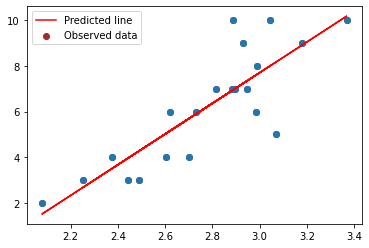

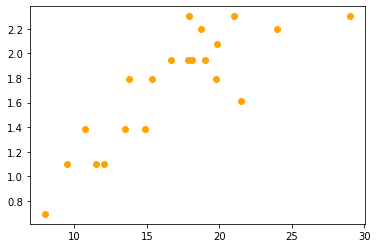

In [ ]:
# Regression Line
plt.scatter(wcat.DT, np.log(wcat.ST))
plt.plot(wcat.DT, pred3, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Error calculation
res3 = wcat.ST - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

###Out[38]: 1.7921450016869798


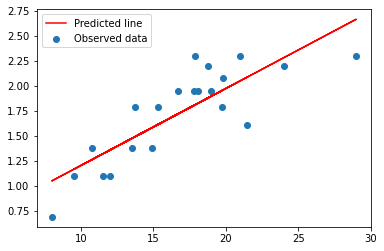

In [ ]:
#### Polynomial transformation
# x = waist; x^2 = waist*waist; y = log(at)

model4 = smf.ols('np.log(ST) ~ DT + I(DT*DT)', data = wcat).fit()
model4.summary()

pred4 = model4.predict(pd.DataFrame(wcat))
pred4_at = np.exp(pred4)
pred4_at

###Out[40]: 
0     8.250905
1     4.531944
2     7.720077
3     9.165723
4     9.206382
5     5.493602
6     7.370749
7     2.705128
8     6.827202
9     7.250110
10    7.756102
11    3.225473
12    6.195767
13    3.561679
14    3.809137
15    5.245998
16    4.659292
17    6.933311
18    2.152041
19    6.791625
20    8.441717
dtype: float64

In [ ]:
# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = wcat.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)
# y = wcat.iloc[:, 1].values


plt.scatter(wcat.DT, np.log(wcat.ST))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()


# Error calculation
res4 = wcat.ST - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

####
Out[43]: 1.3471419800255695


# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

####Out[44]: 
        MODEL      RMSE
0         SLR  1.398343
1   Log model  1.333748
2   Exp model  1.792145
3  Poly model  1.347142

###################
# The best model

from sklearn.model_selection import train_test_split

train, test = train_test_split(wcat, test_size = 0.2)

finalmodel = smf.ols('np.log(ST) ~ DT + I(DT*DT)', data = train).fit()
finalmodel.summary()
######<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(ST)   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     24.06
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           4.27e-05
Time:                        15:36:35   Log-Likelihood:                 2.0479
No. Observations:                  16   AIC:                             1.904
Df Residuals:                      13   BIC:                             4.222
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8541      0.521     -1.638      0.125      -1.980       0.272
DT             0.2357      0.059      3.984      0.002       0.108       0.364
I(DT * DT)    -0.0045      0.002     -2.794      0.015      -0.008      -0.001
==============================================================================
Omnibus:                        2.969   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.227   Jarque-Bera (JB):                1.246
Skew:                          -0.645   Prob(JB):                        0.536
Kurtosis:                       3.455   Cond. No.                     3.22e+03
==============================================================================


Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems. 

In [ ]:
# Predict on test data
test_pred = finalmodel.predict(pd.DataFrame(test))
pred_test_ST = np.exp(test_pred)
pred_test_ST

###Out[52]: 
10    7.803354
0     8.296597
2     7.767231
11    3.193080
13    3.535470
dtype: float64

# Model Evaluation on Test data
test_res = test.ST - pred_test_ST
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse
####Out[58]: 1.183317774317116

# Prediction on train data
train_pred = finalmodel.predict(pd.DataFrame(train))
pred_train_ST = np.exp(train_pred)
pred_train_ST

###Out[62]: 
14    3.787785
12    6.224137
16    4.655822
17    6.973586
4     9.075104
5     5.508036
18    2.104925
8     6.866013
9     7.294097
1     4.525725
6     7.415848
20    8.484909
3     9.178205
7     2.664438
15    5.255192
19    6.829924
dtype: float64

# Model Evaluation on train data
train_res = train.ST- pred_train_ST
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse
#####Out[68]: 1.3967200879042052


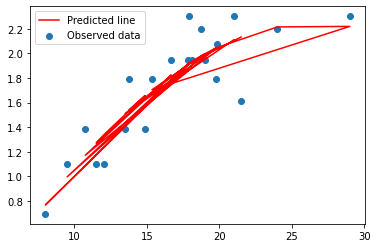

RESULT: Hence the Root mean squared error are b/w 1.2 to 1.7. and Test/Train is between 3 to 9.